In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define paths for Class 1 and Class 0 speakers
class_1_speakers = ['F1', 'F7', 'F8', 'M3', 'M6', 'M8']  # Class 1
class_0_speakers = ['F2', 'F3', 'F4', 'F5', 'F6','F7','F8','F9','F10', 'M1', 'M2', 'M4', 'M5', 'M7', 'M9', 'M10']  # Class 0

# Root directory where cleanraw audio files are located
audio_dir = 'daps/cleanraw/'

# Directory to save generated spectrograms
output_dir = 'spectrograms'

# Function to create and save spectrograms
def create_spectrogram(audio_path, output_image_path,filename):
    y, sr = librosa.load(audio_path)  # Load audio file

    samples_per_partition = 5 * sr
    total_fragments = int(np.ceil(len(y) / samples_per_partition))  # Calculate total number of partitions

    for i in range(total_fragments):
        start_sample = i * samples_per_partition  # Start sample index
        end_sample = min((i+1)*samples_per_partition, len(y))  # End sample index
        fragment = y[start_sample:end_sample]  # Extract partition
        S = librosa.feature.melspectrogram(y=fragment, sr=sr)  # Create Mel spectrogram
        S_dB = librosa.power_to_db(S, ref=np.max)  # Convert to decibel scale
        plt.figure(figsize=(12.8, 12.8))
        plt.axis('off')
        librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')  # Display spectrogram
        plt.savefig(os.path.join(output_image_path,f"part{i}_{filename}"),bbox_inches='tight',pad_inches=0)  # Save the spectrogram as an image
        #plt.show()
        plt.close()

    # S = librosa.feature.melspectrogram(y=y, sr=sr)  # Create Mel spectrogram
    # S_dB = librosa.power_to_db(S, ref=np.max)  # Convert to decibel scale

    # plt.figure(figsize=(2**15/100, 10))
    # plt.axis('off')
    # librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')  # Display spectrogram
    # #plt.colorbar(format='%+2.0f dB')
    # #plt.title('Mel-frequency spectrogram')
    # plt.savefig(output_image_path,bbox_inches='tight',pad_inches=0)  # Save the spectrogram as an image
    # plt.close()

# Process speakers and generate spectrograms for each class
def process_speakers(speakers, class_label):
    class_dir = os.path.join(output_dir, class_label)
    os.makedirs(class_dir, exist_ok=True)  # Create directory if it doesn't exist
    
    for speaker in speakers:
        speaker_files = [f for f in os.listdir(audio_dir) if f.split("_")[0] == speaker.lower()]
        for file in speaker_files:
            audio_path = os.path.join(audio_dir, file)
            # output_image_path = os.path.join(class_dir, )  # Save as .png
            create_spectrogram(audio_path, class_dir,file.replace('.wav', '.png'))
        print(f"Spectrogram created for {speaker}")

# Generate spectrograms for Class 1
process_speakers(class_1_speakers, 'class_1')

# Generate spectrograms for Class 0
process_speakers(class_0_speakers, 'class_0')

print("Finished!")

In [41]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

def test():
    y, sr = librosa.load("daps/cleanraw/f1_script2_cleanraw.wav")  # Load audio file
    A = librosa.feature.melspectrogram(y=y, sr=sr)  # Create Mel spectrogram
    A_dB = librosa.power_to_db(A, ref=np.max)  # Convert to decibel scale
    plt.figure(figsize=(len(y)/10000, 10))
    plt.axis('off')
    librosa.display.specshow(A_dB, sr=sr, x_axis='time', y_axis='mel')  # Display spectrogram
    plt.savefig(os.path.join("test","full.png"),bbox_inches='tight',pad_inches=0)  # Save the spectrogram as an image
    plt.close()

    samples_per_partition = 10 * sr  # 10 seconds of audio per partition

    total_fragments = int(np.ceil(len(y) / samples_per_partition))  # Calculate total number of partitions

    for i in range(total_fragments):
        start_sample = i * samples_per_partition  # Start sample index
        end_sample = min((i+1)*samples_per_partition, len(y))  # End sample index
        fragment = y[start_sample:end_sample]  # Extract partition
        S = librosa.feature.melspectrogram(y=fragment, sr=sr)  # Create Mel spectrogram
        S_dB = librosa.power_to_db(S, ref=np.max)  # Convert to decibel scale
        plt.figure(figsize=(10, 10))
        plt.axis('off')
        librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')  # Display spectrogram
        plt.savefig(os.path.join("test",f"test{i}.png"),bbox_inches='tight',pad_inches=0)  # Save the spectrogram as an image
        #plt.show()
        plt.close()

test()

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

batch_size = 4

dataset = torchvision.datasets.ImageFolder(root='spectrograms', transform=transform)

trainset, testset = torch.utils.data.random_split(dataset, [0.8,0.2])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('class_0', 'class_1')

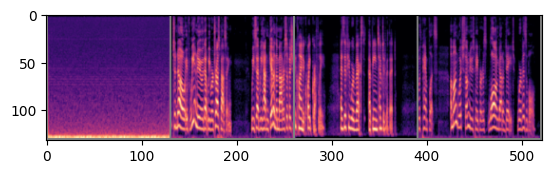

class_0 class_0 class_0 class_0


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.fc1 = nn.Linear(32*29*29, 128)
        self.fc2 = nn.Linear(128, 16)
        self.fc3 = nn.Linear(16, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        #print(i,data)
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 350 == 349:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,   350] loss: 0.104
[1,   700] loss: 0.103
[2,   350] loss: 0.099
[2,   700] loss: 0.099
[3,   350] loss: 0.093
[3,   700] loss: 0.092
[4,   350] loss: 0.073
[4,   700] loss: 0.065
[5,   350] loss: 0.057
[5,   700] loss: 0.050
[6,   350] loss: 0.041
[6,   700] loss: 0.037
[7,   350] loss: 0.034
[7,   700] loss: 0.033
[8,   350] loss: 0.030
[8,   700] loss: 0.028
[9,   350] loss: 0.028
[9,   700] loss: 0.028
[10,   350] loss: 0.027
[10,   700] loss: 0.027
[11,   350] loss: 0.028
[11,   700] loss: 0.025
[12,   350] loss: 0.026
[12,   700] loss: 0.025
[13,   350] loss: 0.024
[13,   700] loss: 0.026
[14,   350] loss: 0.024
[14,   700] loss: 0.025
[15,   350] loss: 0.025
[15,   700] loss: 0.024
[16,   350] loss: 0.023
[16,   700] loss: 0.023
[17,   350] loss: 0.023
[17,   700] loss: 0.026
[18,   350] loss: 0.023
[18,   700] loss: 0.024
[19,   350] loss: 0.024
[19,   700] loss: 0.022
[20,   350] loss: 0.023
[20,   700] loss: 0.023
Finished Training


In [10]:
PATH = './model.pth'
torch.save(net.state_dict(), PATH)

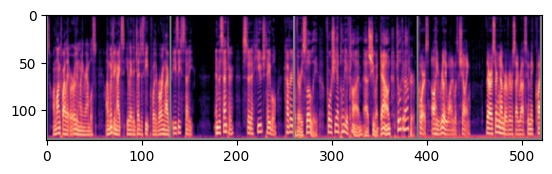

GroundTruth:  class_0 class_0 class_1 class_0


In [19]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [20]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  class_0 class_0 class_1 class_0


In [21]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 84 %


In [22]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: class_0 is 86.2 %
Accuracy for class: class_1 is 80.8 %
